In [8]:
from __future__ import division, print_function, absolute_import
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [147]:
# Training Parameters
learning_rate = 0.01
num_steps = 10000
batch_size = 256

display_step = 100

# Network Parameters
num_hidden_1 = 32
num_input = 784

In [148]:
X = tf.placeholder("float",[None, num_input],name="X")
coded = tf.placeholder("float",[None, num_hidden_1])

w_e = tf.Variable(tf.random_normal([num_input,num_hidden_1]),name="W_E")
b_e = tf.Variable(tf.random_normal([num_hidden_1]),name="B_E")

w_d = tf.Variable(tf.random_normal([num_hidden_1,num_input]),name="W_D")
b_d = tf.Variable(tf.random_normal([num_input]),name="B_D")



tf.summary.histogram("w_e",w_e)
tf.summary.histogram("b_e",b_e)
tf.summary.histogram("w_d",w_d)
tf.summary.histogram("b_d",b_d)

def encoder(x):
    with tf.name_scope("encoder"):
        layer = tf.add(tf.matmul(x,w_e),b_e)
        layer = tf.nn.relu(layer)
        return layer

def decoder(x):
    with tf.name_scope("decoder"):
        layer = tf.add(tf.matmul(x,w_d),b_d)
        layer = tf.nn.sigmoid(layer)
        return layer

encoder_op = encoder(X)
decoder_op = decoder(encoder_op)
img = decoder(coded)

y_pred = decoder_op
y_true = X

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.pow((y_true-y_pred),2))
    optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)
    tf.summary.scalar("loss",loss)
    
init = tf.global_variables_initializer()

In [151]:
sess = tf.Session()
sess.run(init)
writer = tf.summary.FileWriter("./logs/autoencoder", sess.graph) # for 0.8
merged = tf.summary.merge_all()
for i in range(1, num_steps+1):
    batch_x, _ = mnist.train.next_batch(batch_size)

    summary,_, l = sess.run([merged,optimizer, loss], feed_dict={X: batch_x})
    writer.add_summary(summary, i) 
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))

Step 1: Minibatch Loss: 0.478345
Step 100: Minibatch Loss: 0.473971
Step 200: Minibatch Loss: 0.204543
Step 300: Minibatch Loss: 0.176567
Step 400: Minibatch Loss: 0.160303
Step 500: Minibatch Loss: 0.144347
Step 600: Minibatch Loss: 0.139530
Step 700: Minibatch Loss: 0.136039
Step 800: Minibatch Loss: 0.131299
Step 900: Minibatch Loss: 0.125454
Step 1000: Minibatch Loss: 0.123444
Step 1100: Minibatch Loss: 0.120129
Step 1200: Minibatch Loss: 0.115924
Step 1300: Minibatch Loss: 0.109051
Step 1400: Minibatch Loss: 0.113479
Step 1500: Minibatch Loss: 0.107167
Step 1600: Minibatch Loss: 0.108214
Step 1700: Minibatch Loss: 0.107462
Step 1800: Minibatch Loss: 0.100516
Step 1900: Minibatch Loss: 0.099734
Step 2000: Minibatch Loss: 0.098602
Step 2100: Minibatch Loss: 0.099511
Step 2200: Minibatch Loss: 0.097139
Step 2300: Minibatch Loss: 0.092535
Step 2400: Minibatch Loss: 0.094932
Step 2500: Minibatch Loss: 0.092509
Step 2600: Minibatch Loss: 0.090098
Step 2700: Minibatch Loss: 0.093008
Step

In [142]:
saver = tf.train.Saver()
saver.save(sess, './weights/my_test_model')

'./weights/my_test_model'

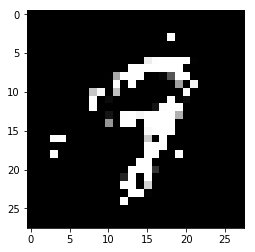

In [145]:
with tf.Session() as newSes:
    new_saver = tf.train.import_meta_graph('./weights/my_test_model.meta')
    new_saver.restore(newSes, tf.train.latest_checkpoint('./weights'))
    test_x = mnist.test.images
    res = newSes.run(encoder_op,feed_dict={X:test_x[100:101]})
    ii = newSes.run(img,feed_dict={coded:res})
    plt.imshow(ii.reshape(28,28),cmap='gray')

In [152]:
# 'tensorboard --logdir=./logs/nn_logs'